# 7章 PID制御

In [1]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

#plt.rcParams['font.family'] ='sans-serif' #使用するフォント
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'cm' # math fontの設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 0.5 # 軸の線幅edge linewidth。囲みの太さ
plt.rcParams['mathtext.default'] = 'it'#'regular'
plt.rcParams['axes.xmargin'] = '0'
plt.rcParams['axes.ymargin'] = '0.05'
plt.rcParams['savefig.facecolor'] = 'None'
plt.rcParams['savefig.edgecolor'] = 'None'

plt.rcParams["legend.fancybox"] = True     # 丸角
# plt.rcParams["legend.framealpha"] = 1    # 透明度の指定、0で塗りつぶしなし
# plt.rcParams["legend.edgecolor"] = 'gray' # edgeの色を変更
plt.rcParams["legend.handlelength"] = 1.8  # 凡例の線の長さを調節
plt.rcParams["legend.labelspacing"] = 0.4  # 垂直方向（縦）の距離の各凡例の距離
plt.rcParams["legend.handletextpad"] = 0.7 # 凡例の線と文字の距離の長さ
plt.rcParams["legend.markerscale"] = 1.0   # 点がある場合のmarker scale

In [2]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

In [3]:
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':', lw=0.5)
    if len(args)==3:
        fig_ax.legend(loc=args[2])

In [4]:
def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both", ls=':', lw=0.5)
    fig_ax[0].set_ylabel('Gain [dB]')

    fig_ax[1].grid(which="both", ls=':', lw=0.5)
    fig_ax[1].set_xlabel('$\omega$ [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')
    
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

## PID制御

### 制御対象

In [5]:
a1 = 2;
a0 = 10;
b0 = 8;

P = tf( [0,b0], [1, a1, a0] )

print(P.pole())

[-1.+3.j -1.-3.j]


### 例7.1: P制御

(0.0, 5.0)

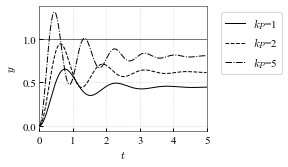

In [6]:
LS = linestyle_generator()
fig, ax = plt.subplots(figsize=(3, 2.3))

kp = (1, 2, 5)
for i in range(3):
    K = tf([0, kp[i]], [0, 1])
    Gyr = feedback(P*K, 1)
    y,t = step(Gyr, np.arange(0, 5, 0.01))
    
    pltargs = {'c':'k','ls': next(LS), 'label': '$k_P$='+str(kp[i]), 'lw':'1'}    
    ax.plot(t, y, **pltargs)
    
    
    #print(stepinfo(Gyr))

ax.axhline(1, color="k", linewidth=0.5)
plot_set(ax, '$t$', '$y$')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)

ax.set_xlim(0, 5)
#ax.set_ylim(0, 50)

#fig.savefig("pcont_step.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

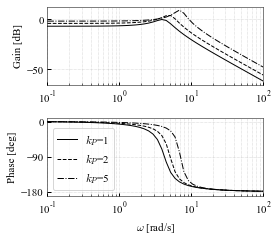

In [7]:
LS = linestyle_generator()
fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

for i in range(len(kp)):
    K = tf([0, kp[i]], [0, 1])
    Gyr = feedback(P*K, 1)
    gain, phase, w = bode(Gyr, logspace(-1,2), plot=False)
    
    pltargs = {'c':'k', 'ls': next(LS), 'label': '$k_P$='+str(kp[i]), 'lw':'1'}
    ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
    ax[1].semilogx(w, phase*180/np.pi, **pltargs)
        
bodeplot_set(ax, 'lower left')

ax[1].set_ylim(-190,10)
ax[1].set_yticks([-180,-90,0])

fig.tight_layout()
#fig.savefig("pcont_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 例7.2: PI制御

(0.0, 5.0)

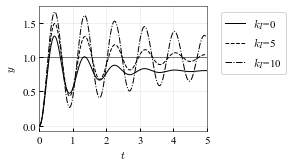

In [8]:
kp = 5
ki = (0, 5, 10)

LS = linestyle_generator()
fig, ax = plt.subplots(figsize=(3, 2.3))

for i in range(3):
    K = tf([kp, ki[i]], [1, 0])
    Gyr = feedback(P*K, 1)
    y,t = step(Gyr,np.arange(0, 5, 0.01))
    
    pltargs = {'c':'k', 'ls': next(LS), 'label': '$k_I$='+str(ki[i]), 'lw':'1'}    
    ax.plot(t, y, **pltargs)

ax.axhline(1, color="k", linewidth=0.5) 
plot_set(ax, '$t$', '$y$')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)

ax.set_xlim(0, 5)
#fig.savefig("picont_step.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

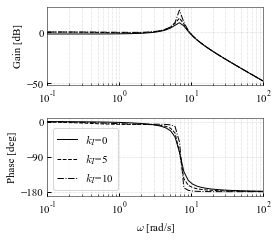

In [9]:
LS = linestyle_generator()
fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

for i in range(3):
    K = tf([kp, ki[i]], [1, 0])
    Gyr = feedback(P*K,1)
    gain, phase, w = bode(Gyr, logspace(-1,2), plot=False)
    
    pltargs = {'c':'k', 'ls': next(LS), 'label': '$k_I$='+str(ki[i]), 'lw':'1'} 
    ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
    ax[1].semilogx(w, phase*180/np.pi, **pltargs)
        
bodeplot_set(ax, 'best')

ax[1].set_ylim(-190,10)
ax[1].set_yticks([-180,-90,0])

fig.tight_layout()
#fig.savefig("picont_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 例7.3: PID制御

(0.0, 5.0)

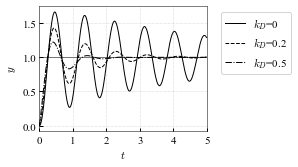

In [11]:
kp = 5
kd = (0, 0.2, 0.5)
ki = 10

LS = linestyle_generator()
fig, ax = plt.subplots(figsize=(3, 2.3))

for i in range(3):
    K = tf([kd[i], kp, ki], [1, 0])
    Gyr = feedback(P*K, 1)
    y, t = step(Gyr, np.arange(0, 5, 0.01))
    
    pltargs = {'c':'k', 'ls': next(LS), 'label': '$k_D$='+str(kd[i]), 'lw':'1'}    
    ax.plot(t, y, **pltargs)

ax.axhline(1, color="k", linewidth=0.5) 
plot_set(ax, '$t$', '$y$')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
 
ax.set_xlim(0, 5)
#fig.savefig("pidcont_step.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

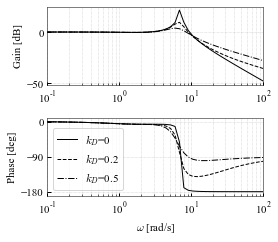

In [12]:
LS = linestyle_generator()
fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

for i in range(3):
    K = tf([kd[i], kp, ki], [1, 0])
    Gyr = feedback(P*K,1)
    gain, phase, w = bode(Gyr, logspace(-1,2), plot=False)
    
    pltargs = {'c':'k', 'ls': next(LS), 'label': '$k_D$='+str(kd[i]), 'lw':'1'} 
    ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
    ax[1].semilogx(w, phase*180/np.pi, **pltargs)
        
bodeplot_set(ax, 'best')

ax[1].set_ylim(-190,10)
ax[1].set_yticks([-180,-90,0])

fig.tight_layout()
#fig.savefig("pidcont_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

## 限界感度法

### 例7.4

In [4]:
# 台車系のモデル
a1 = 2;
b0 = 8;
P = tf([0, b0], [1, a1, 0])

num_delay, den_delay = pade( 0.01, 2) #むだ時間 0.01, 2次のPade近似
Pdelay = P * tf(num_delay, den_delay)

In [48]:
print(pole(Pdelay))

[-300.+173.20508076j -300.-173.20508076j   -2.  +0.j
    0.  +0.j        ]


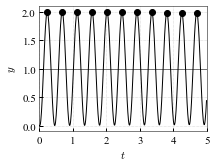

In [49]:
from scipy import signal

fig, ax = plt.subplots(figsize=(3, 2.3))

kp0 = 25
C = tf([0, kp0], [0, 1])
Gyr = feedback(Pdelay*C, 1)
y,t = step(Gyr, np.arange(0, 5, 0.01))

yslice = y[1::]
tslice = t[1::]
[maxId] = signal.argrelmax(yslice)

ax.plot(t, y, color='k', lw=1)
ax.plot(tslice[maxId], yslice[maxId], 'ko')

ax.axhline(1, color='k', linewidth=0.5)    
ax.set_xlim(0, 5)
plot_set(ax, '$t$', '$y$')
ax.grid(ls=':')

#fig.savefig("tune_zn.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

In [64]:
T0 = tslice[maxId[2]]-tslice[maxId[1]]
print('T0=', T0)
print('kP0=', kp0)

# Classic ZN
kp = 0.6 * kp0
ki = kp / (0.5 * T0)
kd = kp * (0.125 * T0)

T0= 0.45000000000000007
kP0= 25


/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


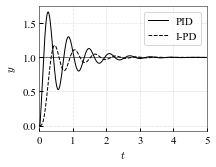

In [71]:
K1 = tf([kd, kp, ki], [1, 0])
K2 = tf([0, ki], [kd, kp, ki])

Gyz = feedback(Pdelay*K1, 1)

Td = np.arange(0, 5, 0.01)
r = 1*(Td>0)

z, t, _ = lsim(K2, r, Td, 0)

fig, ax = plt.subplots(figsize=(3, 2.3))

y, _, _ = lsim(Gyz, r, Td, 0)
ax.plot(t, y, label='PID', lw=1, c='k')

y, _, _ = lsim(Gyz, z, Td, 0)
ax.plot(t, y, ls='--', label='I-PD', lw=1, c='k')

ax.axhline(1, color="k", linewidth=0.5) 
ax.set_xlim(0, 5)
plot_set(ax, '$t$', '$y$', 'best')

#fig.savefig("tune_zn_result.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

## ステップ応答法

### 例7.5

In [5]:
# 台車系のモデル
a1 = 2;
b0 = 8;
P = tf([0, b0], [1, a1, 0])

num_delay, den_delay = pade( 0.01, 2) #むだ時間 0.01, 2次のPade近似
Pdelay = P * tf(num_delay, den_delay)

In [6]:
tdata = np.arange(0, 1, 0.01)
u0 = 10
udata = u0*(tdata>0) 
y, t, _ = lsim(Pdelay, udata, tdata, 0)

# ある程度時間が経過したあとの応答を１次関数で近似する
yslice = y[50::]
tslice = t[50::]
p = np.polyfit(tslice, yslice, 1)
p

/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


array([30.47629261, -8.6641487 ])

(0.0, 1.0)

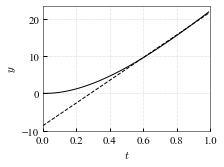

In [7]:
fig, ax = plt.subplots(figsize=(3, 2.3))
y, t, _ = lsim(Pdelay, udata, tdata, 0)
ax.plot(t, y, lw=1, c='k')
ax.plot(t, np.poly1d( p )(t), lw=1, c='k', ls='--')

plot_set(ax, '$t$', '$y$')
ax.set_xlim(0, 1)

#fig.savefig("tune_step.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

In [8]:
R = p[0]/u0
L = -p[1]/p[0]
print(R, L)

kp = 1.2/(R*L)
ki = kp / (2 * L)
kd = kp * (0.5 * L)

print('kP=', kp)
print('kI=', ki)
print('kD=', kd)

3.0476292613586597 0.2842914263199966
kP= 1.3850177808529587
kI= 2.4359119773348206
kD= 0.19687434019862204


/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


(0.0, 5.0)

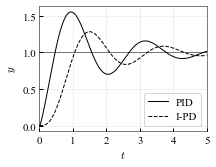

In [35]:
K1 = tf([kd, kp, ki], [1, 0])
K2 = tf([0, ki], [kd, kp, ki])

Gyz = feedback(Pdelay*K1, 1)

Td = np.arange(0, 5, 0.01)
r = 1*(Td>0)

z, t, _ = lsim(K2, r, Td, 0)

fig, ax = plt.subplots(figsize=(3, 2.3))

y, _, _ = lsim(Gyz, r, Td, 0)
ax.plot(t, y, lw = 1, c='k',  label='PID')

y, _, _ = lsim(Gyz, z, Td, 0)
ax.plot(t, y, ls='--', lw = 1, c='k', label='I-PD')

ax.axhline(1, color="k", linewidth=0.5)  
plot_set(ax, '$t$', '$y$', 'best')
ax.set_xlim(0, 5)

#fig.savefig("tune_step_result.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

## モデルマッチング

### 規範モデル

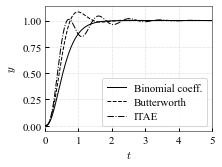

In [36]:
alpha1 = (3, 2, 2.15)
alpha2 = (3, 2, 1,75)
omega_n = 5
Label = ('Binomial coeff.', 'Butterworth', 'ITAE')

LS = linestyle_generator()
fig, ax = plt.subplots(figsize=(3, 2.3))

for i in range(3):
    M = tf([0, omega_n**3], [1, alpha2[i]*omega_n, alpha1[i]*omega_n**2, omega_n**3])
    y,t = step(M, np.arange(0, 5, 0.01))
    
    ax.plot(t, y, ls=next(LS), label=Label[i], lw=1, c='k')

ax.set_xlim(0, 5)
plot_set(ax, '$t$', '$y$', 'best')

#fig.savefig("ref_model_3rd.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)  

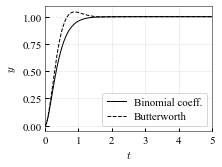

In [37]:
omega_n = 5
zeta = (1, 1/np.sqrt(2))
Label = ('Binomial coeff.', 'Butterworth')

LS = linestyle_generator()
fig, ax = plt.subplots(figsize=(3, 2.3))

for i in range(2):
    Msys = tf([0,omega_n**2], [1,2*zeta[i]*omega_n,omega_n**2])
    y, t = step(Msys, np.arange(0, 5, 0.01))
    
    ax.plot(t, y, ls=next(LS), label=Label[i], lw=1, c='k')

ax.set_xlim(0, 5)
plot_set(ax, '$t$', '$y$', 'best')

#fig.savefig("ref_model_2nd.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)  

### 例題7.1

kP= 0.8840169731258841
kP= 3.125
kP= 0.25007552280788803


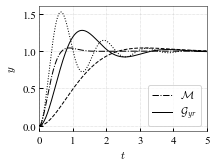

In [38]:
omega_n = 5
zeta = 0.707

a1 = 2;
a0 = 10;
b0 = 8;

Msys = tf([0,omega_n**2], [1,2*zeta*omega_n,omega_n**2])

kp = a1*omega_n/(2*b0* zeta)
print('kP=', kp)
Gyr = tf([0, b0*kp], [1, a1, b0*kp])

yM, tM = step(Msys, np.arange(0, 5, 0.01))
y, t = step(Gyr, np.arange(0, 5, 0.01))

fig, ax = plt.subplots(figsize=(3, 2.3))

ax.plot(tM, yM, label='$\mathcal{M}$', ls = '-.', c='k', lw=1)
ax.plot(t, y, label='$\mathcal{G}_{y\, r}$', lw=1, c='k')

##### 速応性に注目

kp = omega_n**2/b0
print('kP=', kp)
Gyr = tf([0, b0*kp], [1, a1, b0*kp])
y, t = step(Gyr, np.arange(0, 5, 0.01))
ax.plot(t, y, c='k', lw=1, ls=':')

##### 減衰性に注目

kp = a1**2/(4*zeta**2*b0)
print('kP=', kp)
Gyr = tf([0, b0*kp], [1, a1, b0*kp])
y, t = step(Gyr, np.arange(0, 5, 0.01))
ax.plot(t, y, c='k', lw=1, ls='--')

ax.set_xlim(0, 5)
plot_set(ax, '$t$', '$y$', 4)

#fig.savefig("model_match.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

## ２自由度制御

In [12]:
a1 = 2;
a0 = 10;
b0 = 8;

P = tf( [0,b0], [1, a1, a0] )

/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


(0.0, 5.0)

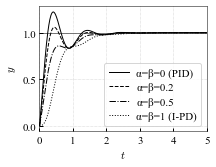

In [17]:
kp = 5
kd = 0.5
ki = 10

alpha = (0, 0.2,  0.5, 1)
beta = (0, 0.2, 0.5, 1)
K1 = tf([kd, kp, ki], [1, 0])

LS = linestyle_generator()
fig, ax = plt.subplots(figsize=(3, 2.3))

for i in range(len(alpha)):
    K2 = tf([(1-beta[i])*kd, (1-alpha[i])*kp, ki], [kd, kp, ki])

    Gyz = feedback(P*K1, 1)

    Td = np.arange(0, 5, 0.01)
    r = 1*(Td>0)

    z, t, _ = lsim(K2, r, Td, 0)

    y, _, _ = lsim(Gyz, z, Td, 0)
    pltargs = {'c':'k', 'ls': next(LS), 'lw':'1'}    
    ax.plot(t, y, **pltargs)

ax.axhline(1, color="k", linewidth=0.5)  
plot_set(ax, '$t$', '$y$')
plt.legend(['α=β=0 (PID)',"α=β=0.2","α=β=0.5","α=β=1 (I-PD)"],loc='best')
ax.set_xlim(0, 5)

# fig.savefig("ipdcont_step.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

## 章末問題

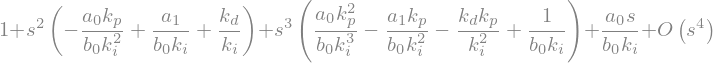

In [738]:
import sympy as sp
s = sp.Symbol('s')
kp, ki, kd = sp.symbols('k_p k_i k_d')
a0, a1, b0 = sp.symbols('a_0 a_1 b_0')
sp.init_printing()

G = b0*(kp*s+ki)/(s**3 + (a1 + b0*kd)*s**2 + (a0+b0*kp)*s + b0*ki)
sp.series(1/G, s, 0, 4)

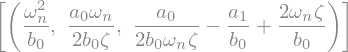

In [739]:
import sympy as sp
z, wn = sp.symbols('zeta omega_n')
sp.init_printing()

f1 = a0/b0/ki-2*z/wn
f2 = -a0/b0*kp/(ki**2)+a1/b0/ki+kd/ki -1/(wn**2)
f3 = a0/b0*kp**2/(ki**3)-a1/b0*kp/(ki**2) - kd*kp/(ki**2) + 1/b0/ki
sp.solve([f1, f2, f3],[kp, ki, kd])

## 付録

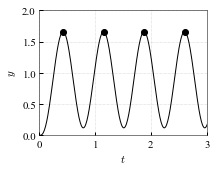

In [39]:
k = 8
G = tf([0, 125], [1, 15, 75, 125])

fig, ax = plt.subplots(figsize=(3, 2.3))

Gyr = feedback(G*k, 1)
y,t = step(Gyr, np.arange(0, 5, 0.01))

yslice = y[1::]
tslice = t[1::]
[maxId] = signal.argrelmax(yslice)

ax.plot(t, y, color='k', lw=1)
ax.plot(tslice[maxId], yslice[maxId], 'ko')

#ax.axhline(1, color='k', linewidth=0.5)    
ax.set_xlim(0, 3)
ax.set_ylim(0, 2)
plot_set(ax, '$t$', '$y$')
ax.grid(ls=':')

#fig.savefig("tune_zn_image.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

(-6.0, 6.0)

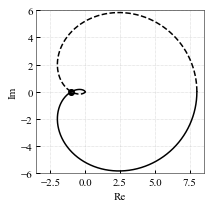

In [40]:
fig, ax = plt.subplots(figsize=(3, 3))

x, y, _ = nyquist(G*k, logspace(-5,5,10000), plot=False)
ax.plot(x, y, color='k')
ax.plot(x, -y, ls='--', color='k')
ax.scatter(-1, 0, color='k')
plot_set(ax, 'Re', 'Im')

ax.set_xlim(-3.5, 8.5)
ax.set_ylim(-6, 6)

#fig.savefig("tune_zn_image_open.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


(0.0, 1.0)

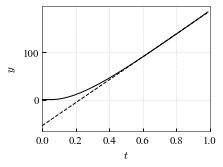

In [43]:
G = tf([0, 125], [1, 5, 0])
num_delay, den_delay = pade( 0.05, 2)
Gdelay = G * tf(num_delay, den_delay)

tdata = np.arange(0, 1, 0.01)
u0 = 10
udata = u0*(tdata>0) 

fig, ax = plt.subplots(figsize=(3, 2.3))
y, t, _ = lsim(Gdelay, udata, tdata, 0)

# ある程度時間が経過したあとの応答を１次関数で近似する
yslice = y[50::]
tslice = t[50::]
p = np.polyfit(tslice, yslice, 1)

ax.plot(t, y, lw=1, c='k')
ax.plot(t, np.poly1d( p )(t), lw=1, c='k', ls='--')

plot_set(ax, '$t$', '$y$')
ax.set_xlim(0, 1)

#fig.savefig("tune_step.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


(0.0, 15.0)

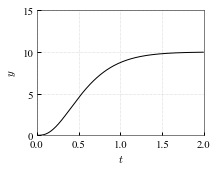

In [44]:
G = tf([0, 125], [1, 15, 75, 125])

tdata = np.arange(0, 2, 0.01)
u0 = 10
udata = u0*(tdata>0) 

fig, ax = plt.subplots(figsize=(3, 2.3))
y, t, _ = lsim(G, udata, tdata, 0)

ax.plot(t, y, lw=1, c='k')
#ax.plot(t, np.poly1d( p )(t), lw=1, c='k', ls='--')

plot_set(ax, '$t$', '$y$')
ax.set_xlim(0, 2)
ax.set_ylim(0, 15)

#fig.savefig("tune_step2.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)